# SKLearn : Inspection

#### Decision Boundary
Explore the decision boundary of the SVM Classifier

https://scikit-learn.org/stable/visualizations.html#visualizations

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib 
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
%matplotlib inline

### Create Blob Data

In [5]:
n_samples_1 = 1000
n_samples_2 = 100

centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]

X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    shuffle=True,
    random_state=0
)

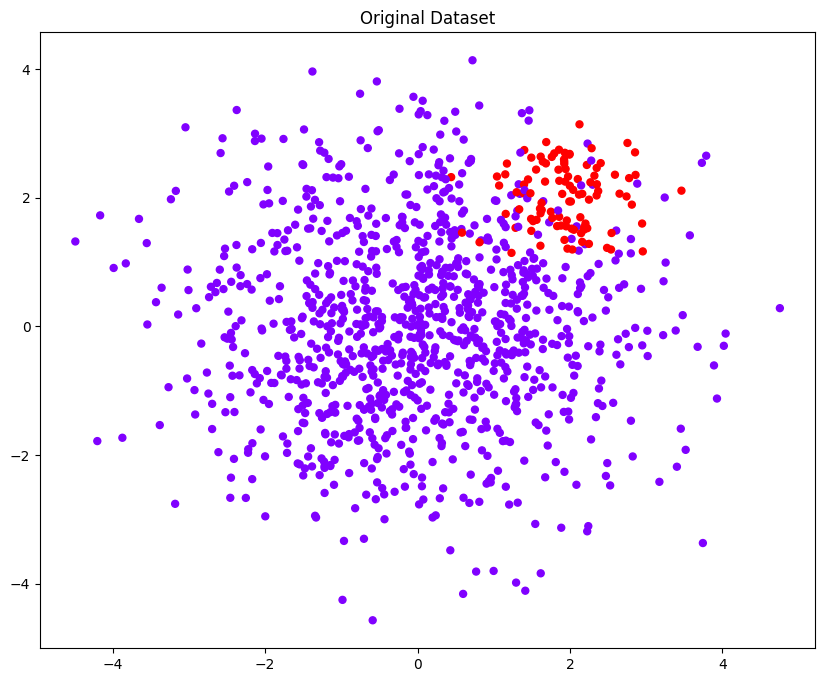

In [6]:
fig = plt.figure(figsize=(10,8))

plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap='rainbow')
plt.title("Original Dataset")

plt.show()

### Application of SVM on Blob Data

In [7]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
# fit the model and get the separating hyperplane without using weighted classes
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={0:1, 1:10})
wclf.fit(X, y)

SVC(class_weight={0: 1, 1: 10}, kernel='linear')

### Decision Boundary

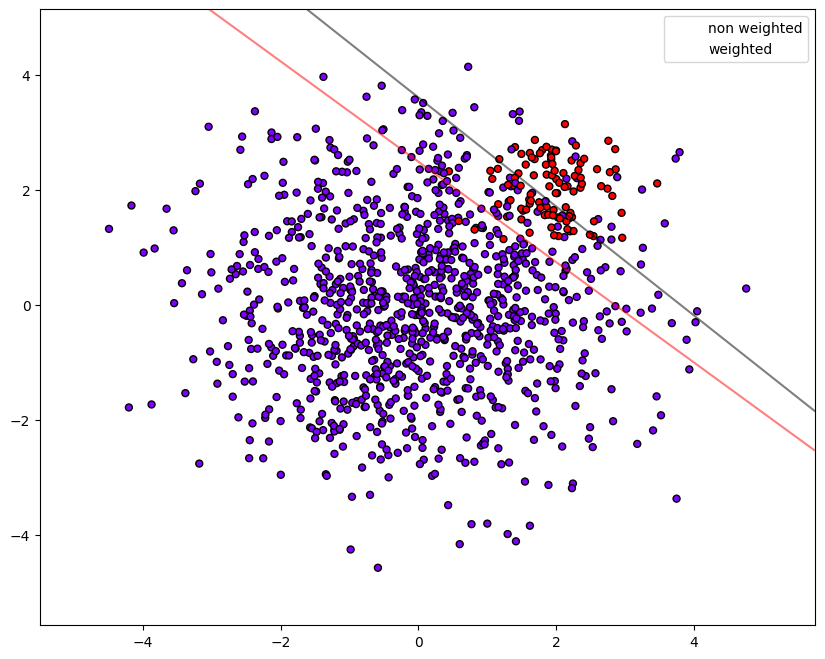

In [9]:
fig = plt.figure(figsize=(10,8))


# plot the samples
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap='rainbow', edgecolors="k")


# plot decision boundary and margins for model without weighted classes
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k", levels=[0],
    #plot_method="pcolormesh", shading="auto",
    alpha=0.5,
    linestyles=["-"],
    ax=ax)


# plot decision boundary and margins for model with weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r", levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax)


plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right")


plt.show()